# **<center> CHE1125 - Homework 8 </center>**

### **<center> Abhishek Patel </center>**

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.integrate import odeint

sns.set_theme(context='paper', style='darkgrid', palette='brg', font='sans-serif', font_scale=1, color_codes=True)

# 1. Obtain a simplified equation for competitive inhibition (just like the tutorial) Using this derivation and assuming a cooperativity coefficient of 5 (n=5), simulate the product concentration profile under the following conditions:

- kcat = 10 s-1
- KM = 110 µM
- Initial Enzyme Concentration = 50 µM
- Initial Substrate Concentration = 500 µM
- Initial Inhibitor Concentration = [0, 50, 100, 500, 1000] µM
- KI = 150 µM 

In [4]:
def CompInhibit(y, t, kcat, Km, Ki, Eo, I, n):
    
    
    S  = y[0]
    P  = y[1]
    
    Km_app = Km * (1 + (I/Ki)**n)
    
    dPdt  =  kcat*Eo*S/(Km_app)
    dSdt  = -dPdt

    return [dSdt, dPdt]   

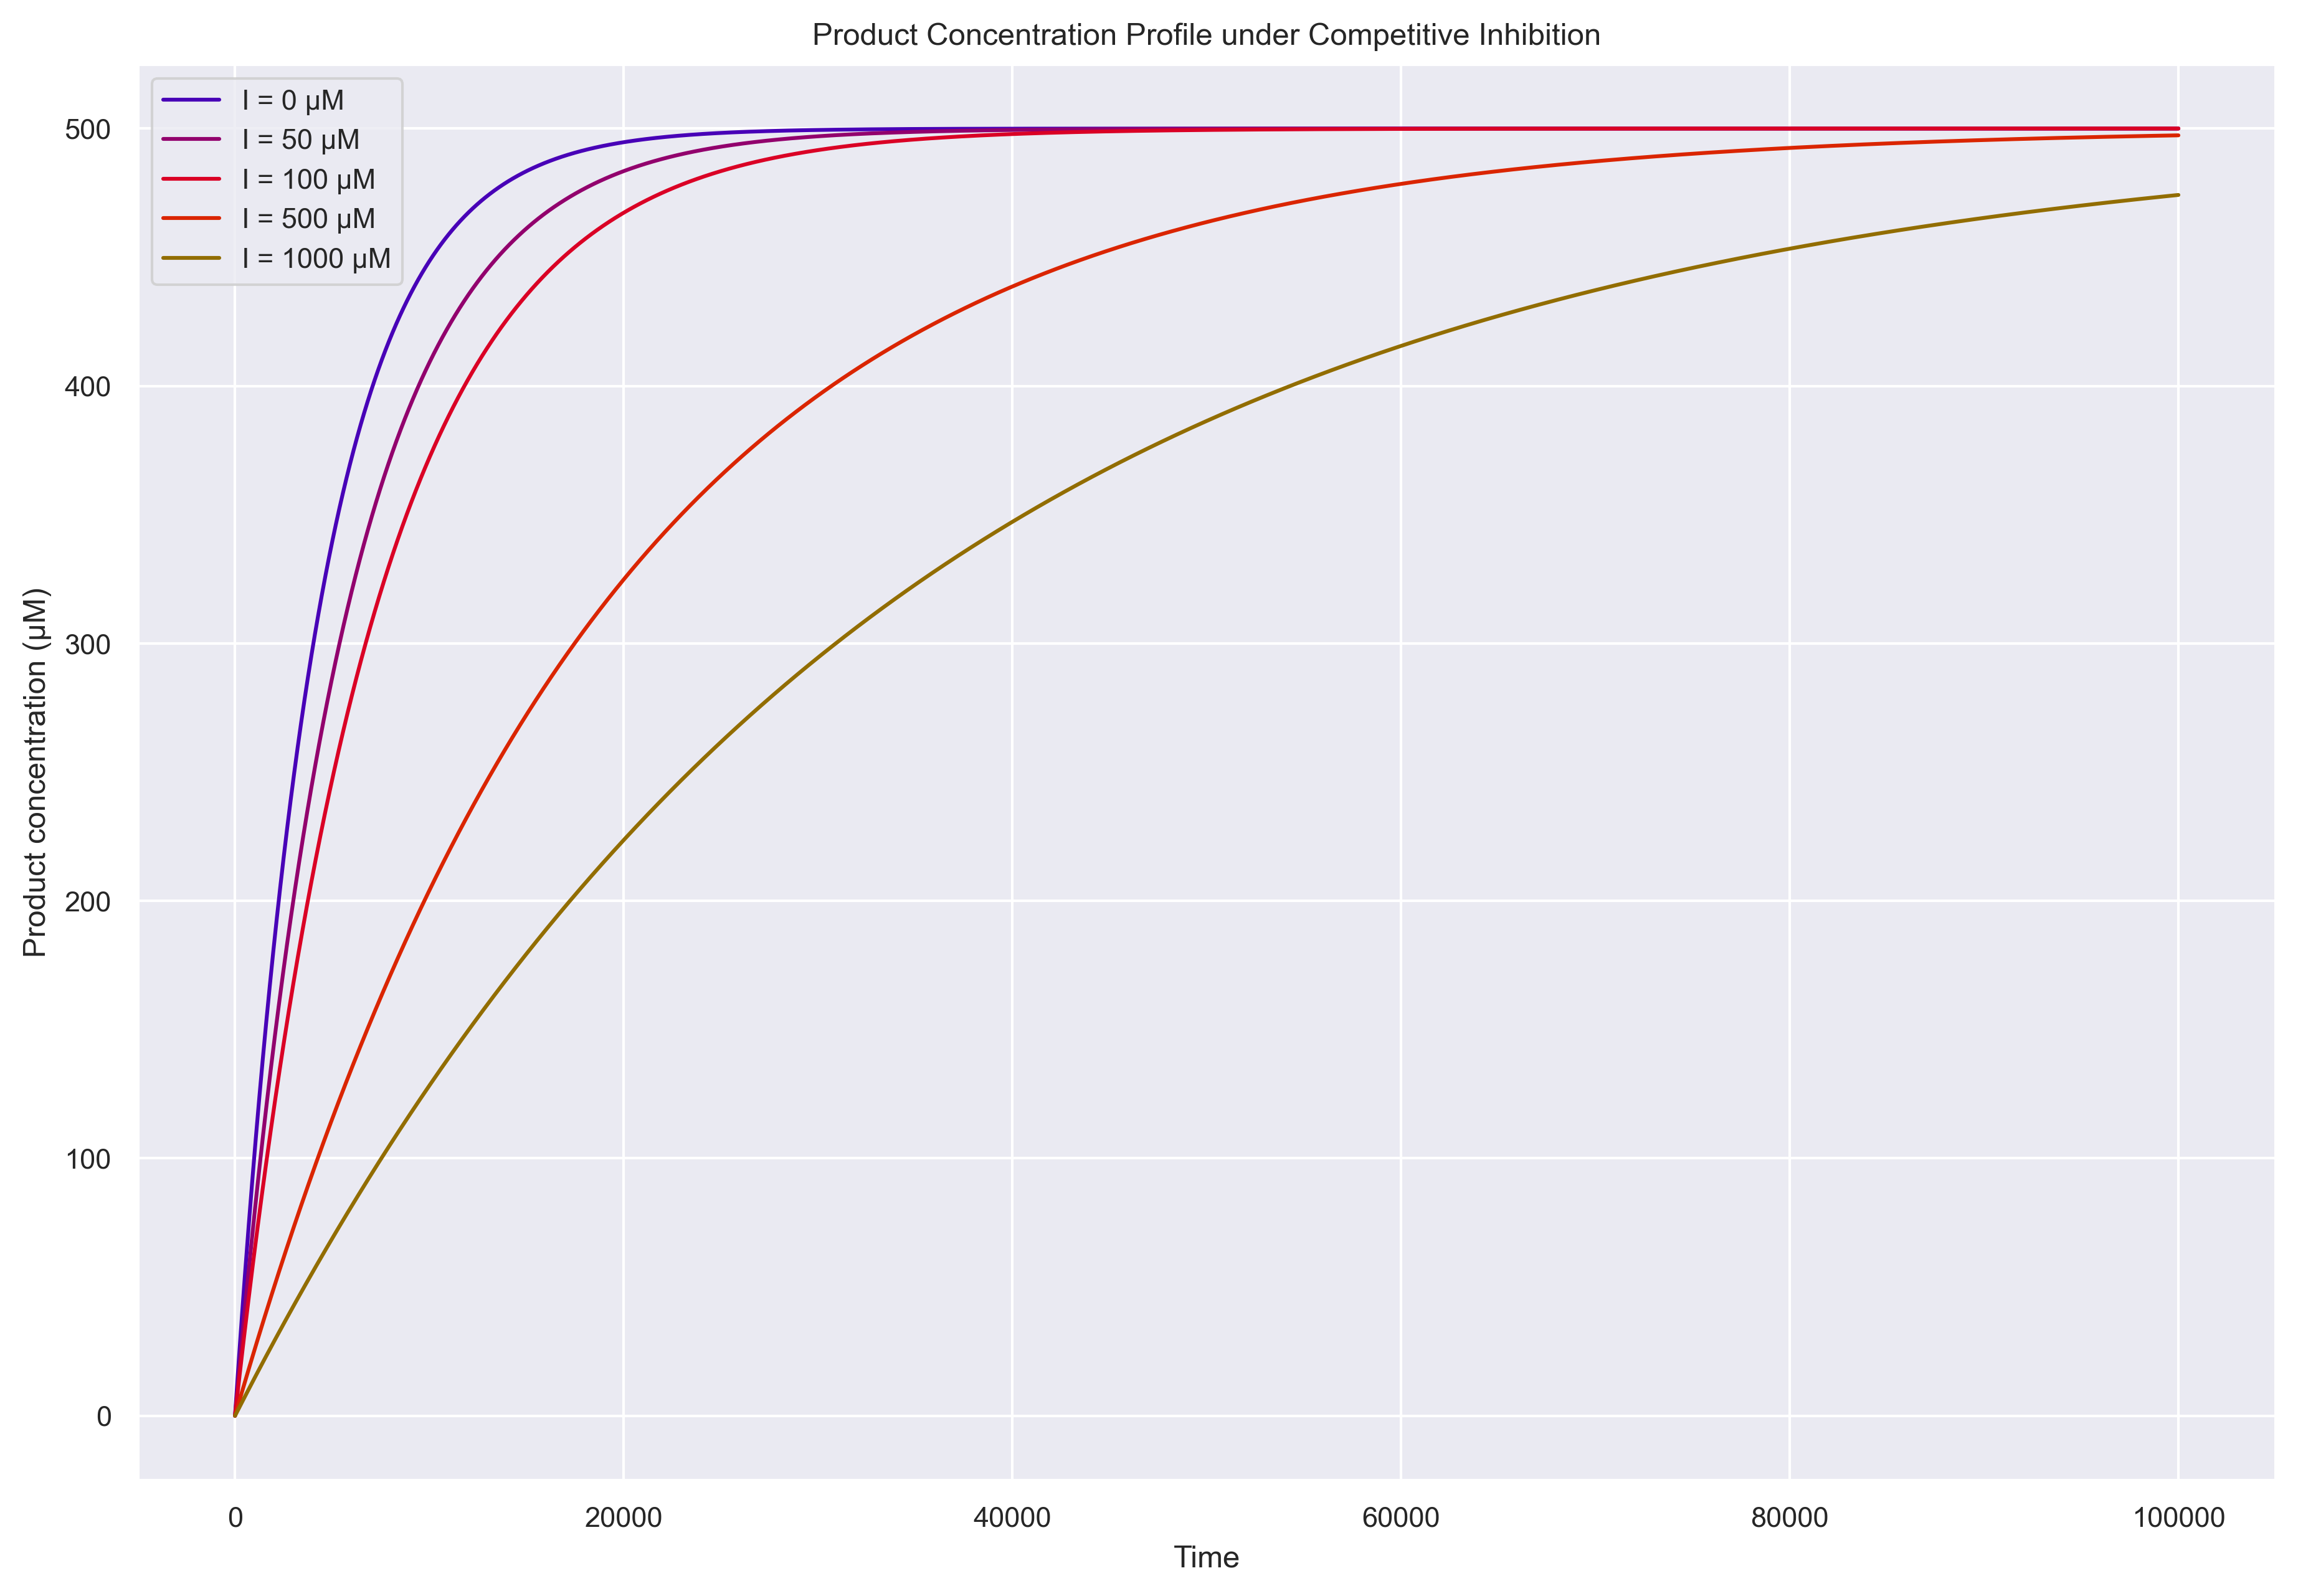

In [5]:
# Set parameters
kcat = 10  # s^-1
Km = 110  # µM
Ki = 150  # µM
Eo = 50  # µM
I_values = [0, 50, 100, 500, 1000]  # µM
S0 = 500  # µM
P0 = 0 # µM
t = np.linspace(0, 5, 100000)  # 100000 time points from 0 to 5
n = 1

# Plot figure to get detailed image
plt.figure(figsize = (12, 8), dpi = 369)

# Simulate Product Concentration Profile for each I
for I in I_values:
    y0 = [S0, P0]  # Initial conditions for Product and Substrate
    y = odeint(CompInhibit, y0, t, args = (kcat, Km, Ki, Eo, I, n)) # Solving ODE
    S, P = y.T  # Extract substrate and product concentrations
    
    # Plot Product Concentration vs. Time
    sns.lineplot(P, label = f'I = {I} µM').set(title = 'Product Concentration Profile under Competitive Inhibition')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Product concentration (µM)')
plt.show()

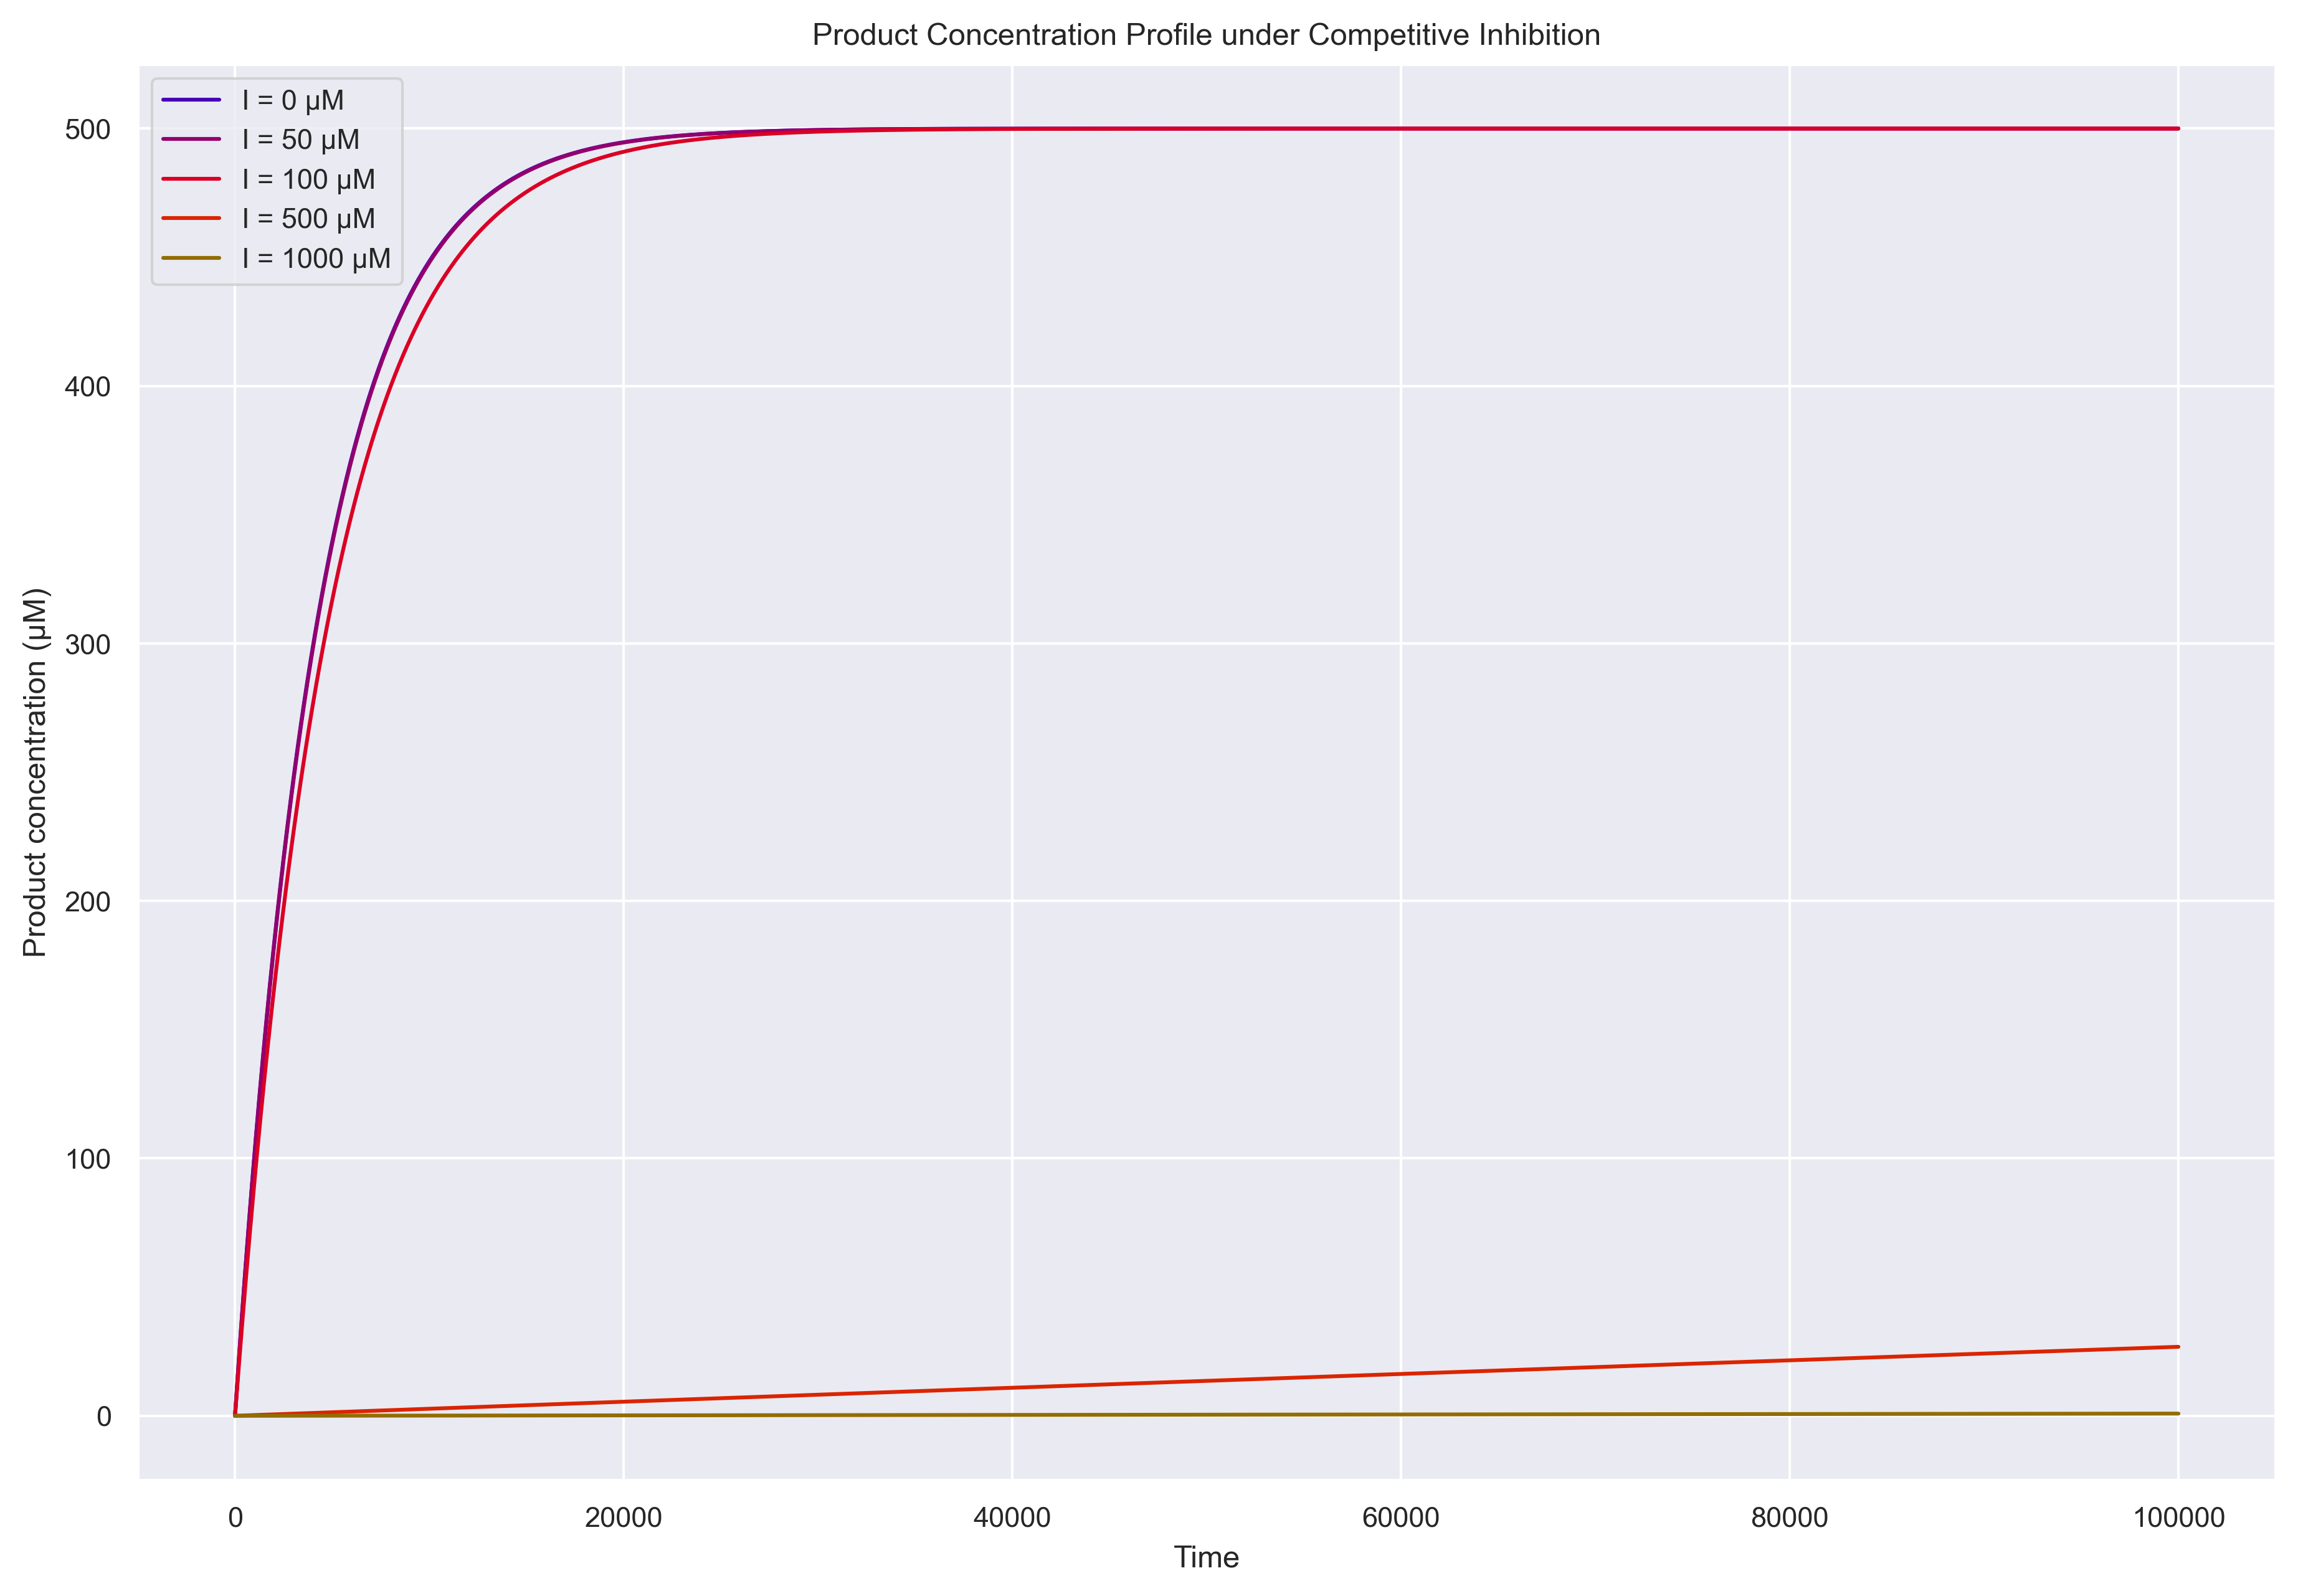

In [6]:
# Set parameters
kcat = 10  # s^-1
Km = 110  # µM
Ki = 150  # µM
Eo = 50  # µM
I_values = [0, 50, 100, 500, 1000]  # µM
S0 = 500  # µM
P0 = 0 # µM
t = np.linspace(0, 5, 100000)  # 100000 time points from 0 to 5
n = 5

# Plot figure to get detailed image
plt.figure(figsize = (12, 8), dpi = 369)

# Simulate Product Concentration Profile for each I
for I in I_values:
    y0 = [S0, P0]  # Initial conditions for Product and Substrate
    y = odeint(CompInhibit, y0, t, args = (kcat, Km, Ki, Eo, I, n)) # Solving ODE
    S, P = y.T  # Extract substrate and product concentrations
    
    # Plot Product Concentration vs. Time
    sns.lineplot(P, label = f'I = {I} µM').set(title = 'Product Concentration Profile under Competitive Inhibition')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Product concentration (µM)')
plt.show()

# 2. Compare those results with different cooperativity coefficients. How does cooperativity affect inhibition? Discuss why in no more than 2 sentences.

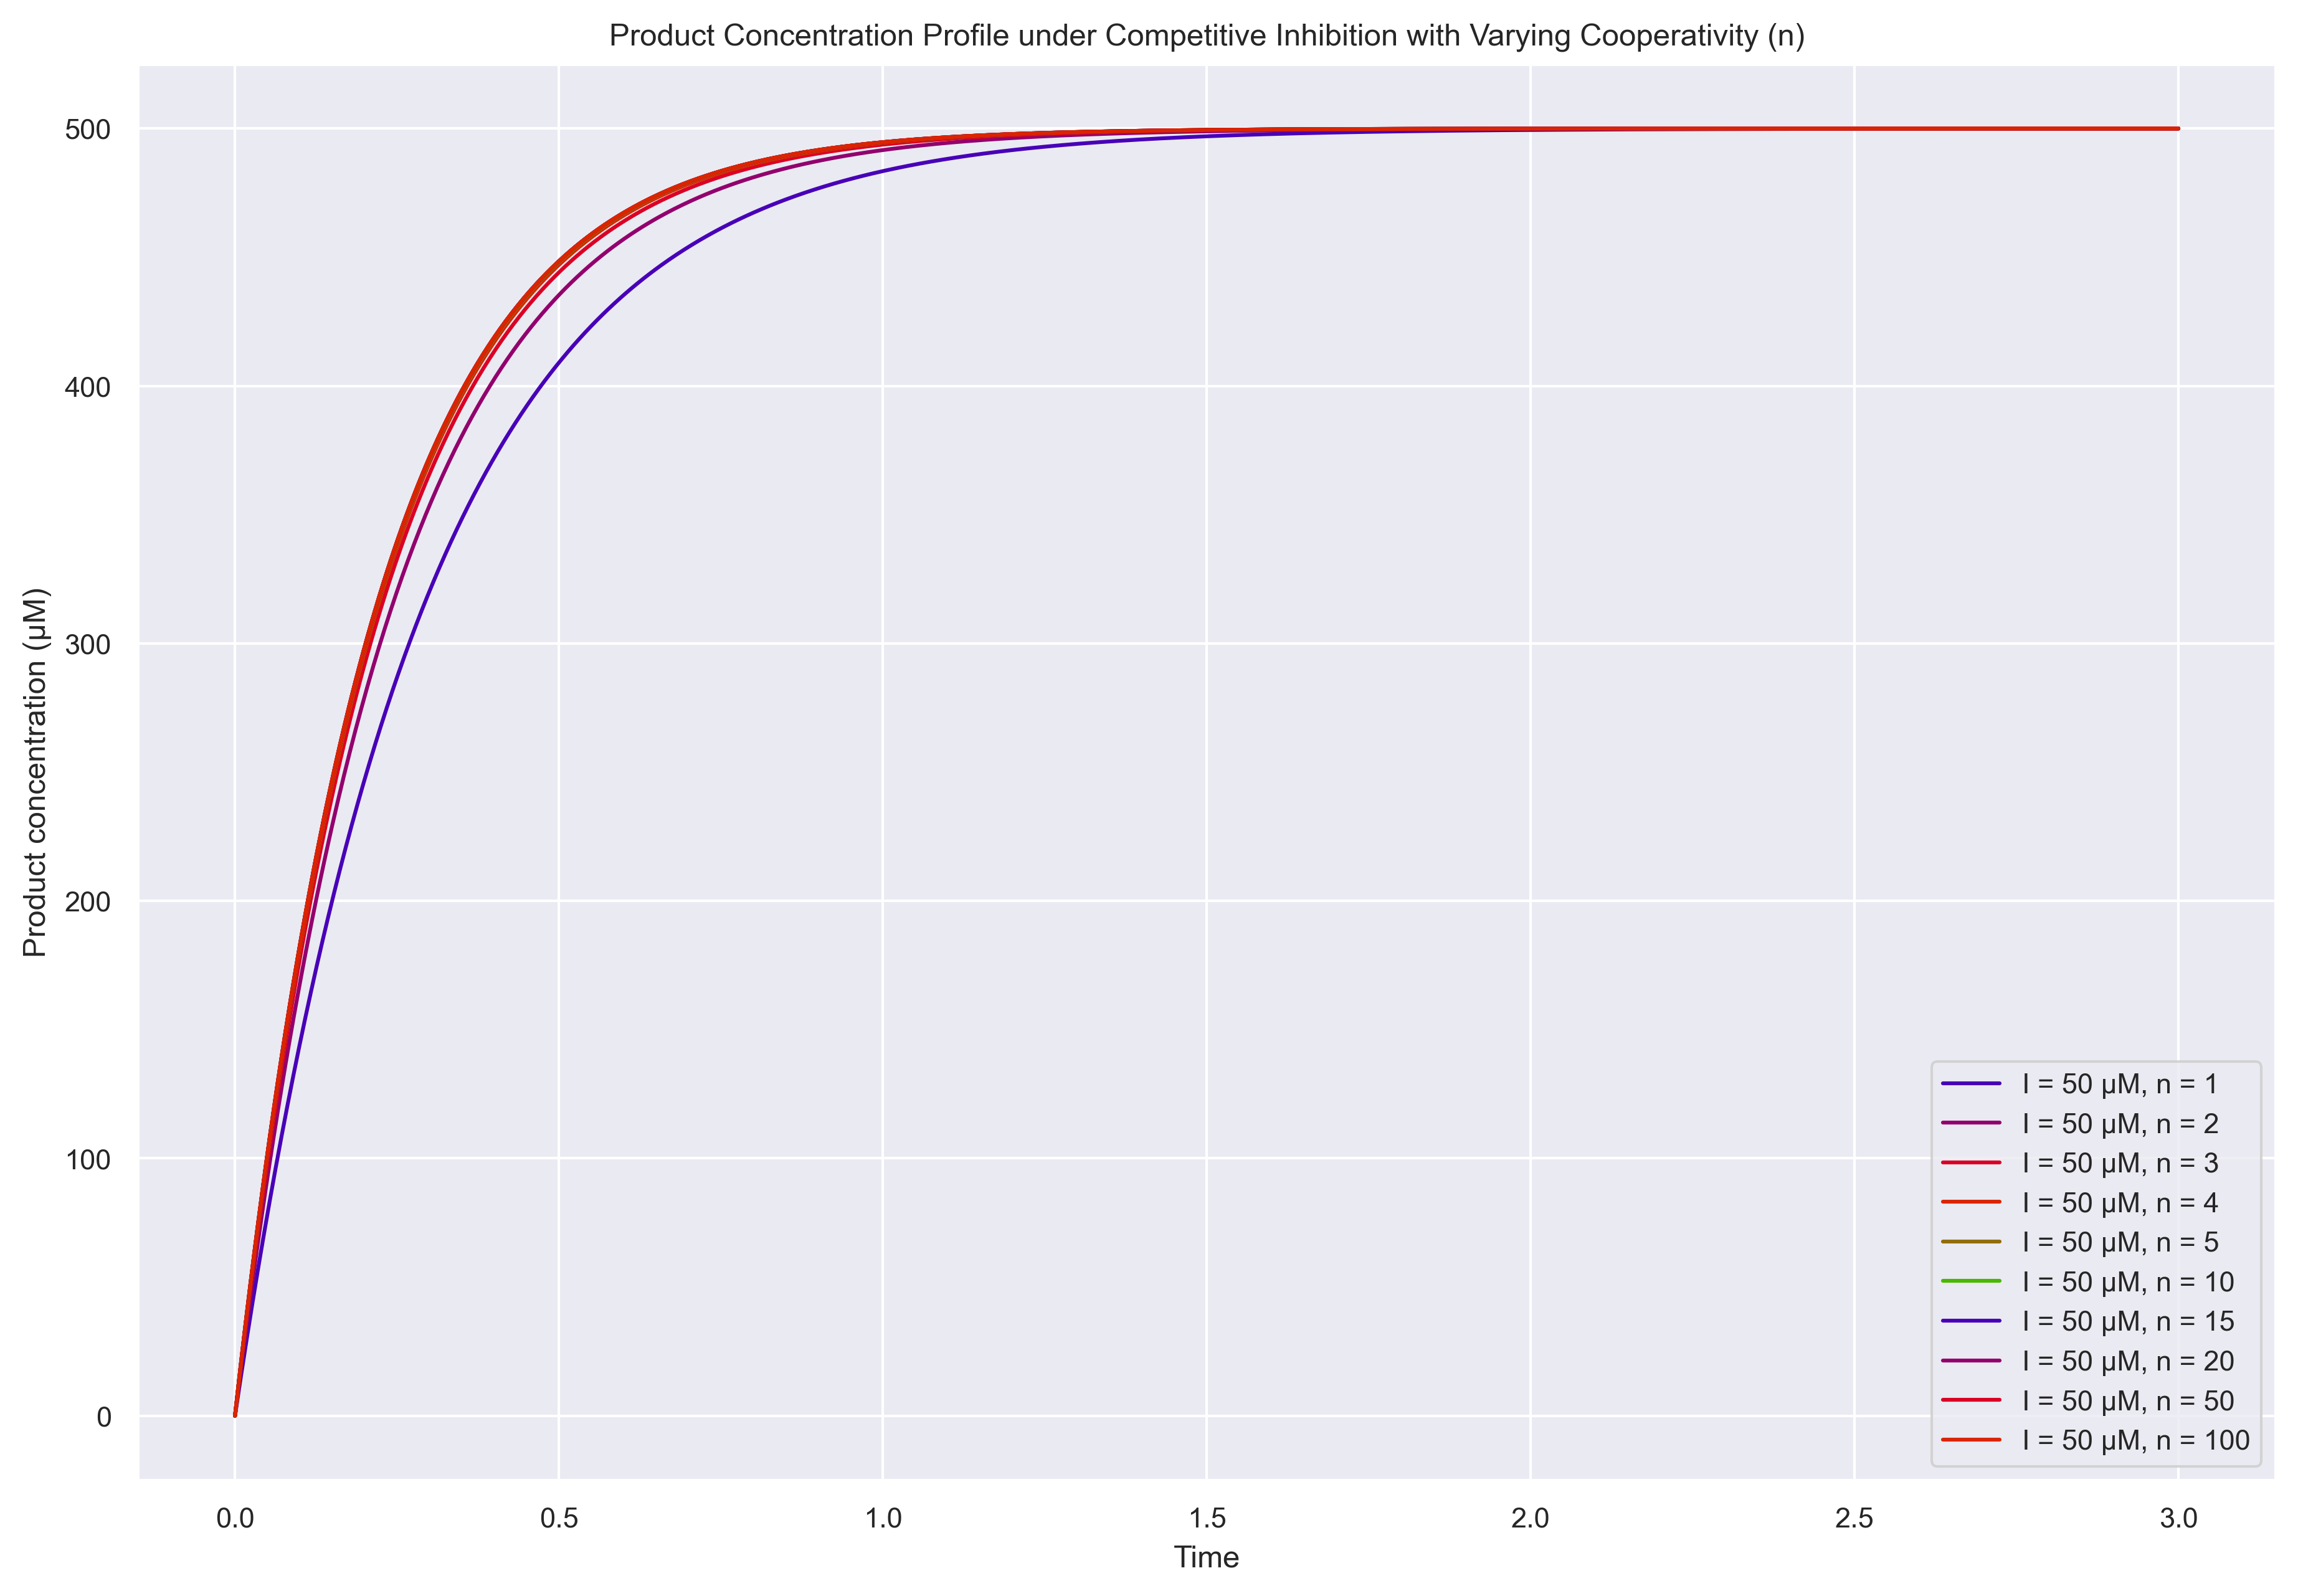

In [49]:
# Set parameters
kcat = 10  # s^-1
Km = 110  # µM
Ki = 150  # µM
Eo = 50  # µM
I_values = [50]  # µM
n_values = [1, 2, 3, 4, 5, 10, 15, 20, 50, 100]

# Plot figure to get detailed image
plt.figure(figsize=(12, 8), dpi=369)

# Define time points
t = np.linspace(0, 3, 1000)  # 1000 time points from 0 to 5

# Simulate Product Concentration Profile for each I and n
for I in I_values:
    for n in n_values:
        y0 = [S0, P0]  # Initial conditions for Product and Substrate
        y = odeint(CompInhibit, y0, t, args=(kcat, Km, Ki, Eo, I, n))  # Solving ODE
        S, P = y.T  # Extract substrate and product concentrations
    
        # Plot Product Concentration vs. Time
        plt.plot(t, P, label=f'I = {I} µM, n = {n}')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Product concentration (µM)')
plt.legend()
plt.title('Product Concentration Profile under Competitive Inhibition with Varying Cooperativity (n)')
plt.show()
